In [1]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Geographic segmentation

#### State and UT-wise publicly operating EV charging station data

In [2]:
data_charging_station = pd.read_csv('../Dataset/state_ut_pcs.csv', index_col=0)
data_charging_station.sample(5)

,State/UT,No. of Operational PCS
Sl. No.,,
21,Meghalaya,19
14,Jharkhand,60
Total,Total,6586
27,Sikkim,1
9,Goa,44


In [3]:
data_charging_station = data_charging_station.iloc[:-1,:] #dropping the last row which contains the total

#### Using just the number of publicly available charging stations is not a very good measure, so here I have used number of charging stations per sq kilometers for each state

In [4]:
data_state_area = pd.read_excel('../Dataset/state_area.xlsx', index_col=0)
data_state_area.head()

,State / Territory,Area (km2),Region,National Share (%)
Rank,,,,
1,Rajasthan,342239,Northern,10.41
2,Madhya Pradesh,308252,Central,9.38
3,Maharashtra,307713,Western,9.36
4,Uttar Pradesh,240928,Central,7.33
5,Gujarat,196024,Western,5.96


In [5]:
data_charging_station.head()

,State/UT,No. of Operational PCS
Sl. No.,,
1,Andaman and Nicobar,3
2,Andhra Pradesh,222
3,Arunachal Pradesh,9
4,Assam,48
5,Bihar,83


In [6]:
data_charging_station= pd.merge(data_charging_station, data_state_area, left_on="State/UT", right_on="State / Territory" ).iloc[:,[0,1,3]]
data_charging_station.head()

,State/UT,No. of Operational PCS,Area (km2)
0,Andaman and Nicobar,3,8249
1,Andhra Pradesh,222,162968
2,Arunachal Pradesh,9,83743
3,Assam,48,78438
4,Bihar,83,94163


In [7]:
data_charging_station['PCS_per_sqkm'] = data_charging_station['No. of Operational PCS']/data_charging_station['Area (km2)']
data_charging_station.head()

,State/UT,No. of Operational PCS,Area (km2),PCS_per_sqkm
0,Andaman and Nicobar,3,8249,0.000364
1,Andhra Pradesh,222,162968,0.001362
2,Arunachal Pradesh,9,83743,0.000107
3,Assam,48,78438,0.000612
4,Bihar,83,94163,0.000881


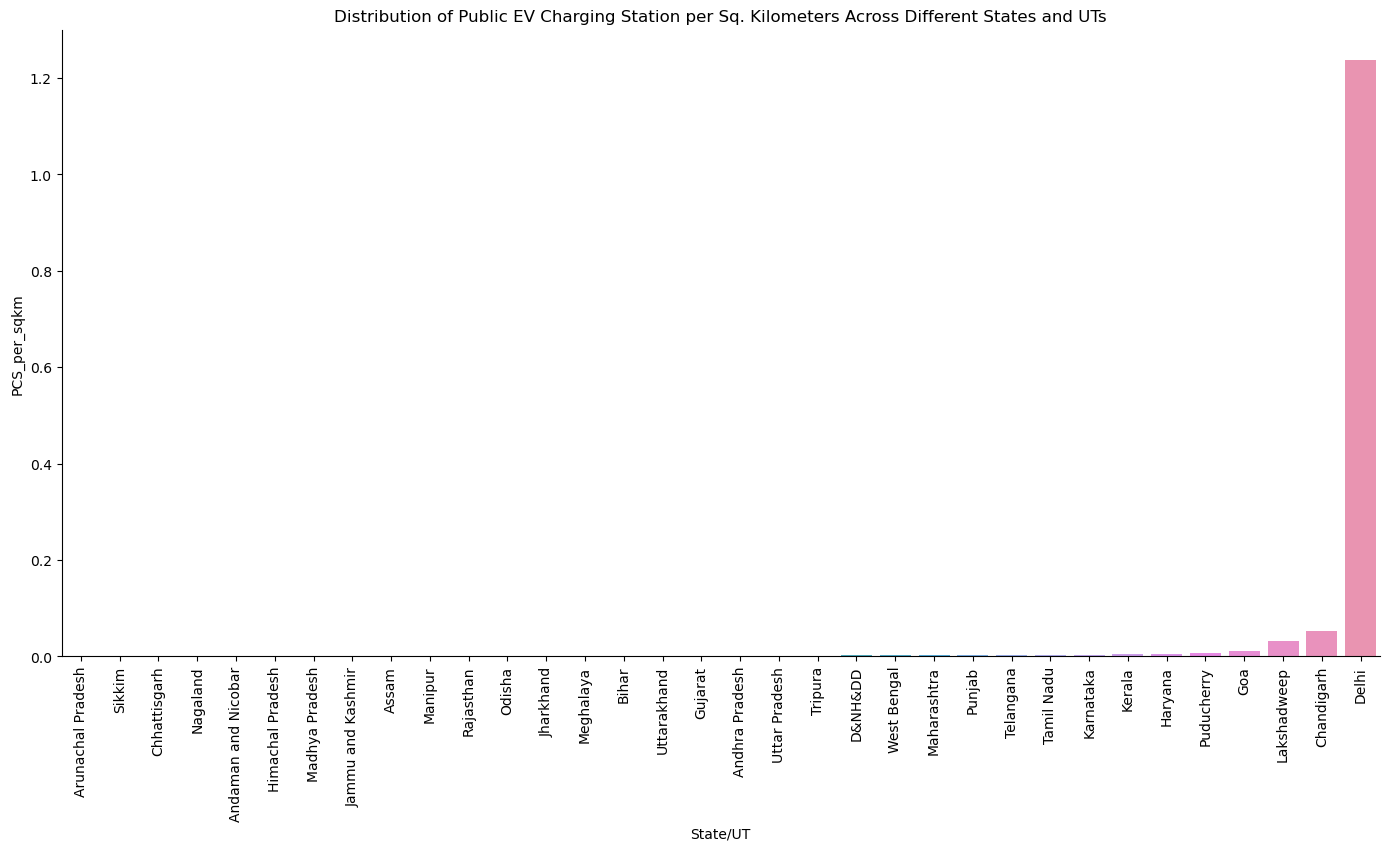

In [8]:
sns.catplot(
    kind='bar',
    data=data_charging_station.sort_values(
        by='PCS_per_sqkm'
    ),
    x='State/UT',
    y='PCS_per_sqkm',
    height=7,
    aspect=2
)
plt.xticks(rotation=90)
plt.title('Distribution of Public EV Charging Station per Sq. Kilometers Across Different States and UTs')
plt.show()

#### As we can see, Delhi has the most PCS per sq kilometers, followed by Chandigarh, Lakshadweep and so on. But the number of PCS in Delhi dominates all other number, so plotting it again excluding delhi

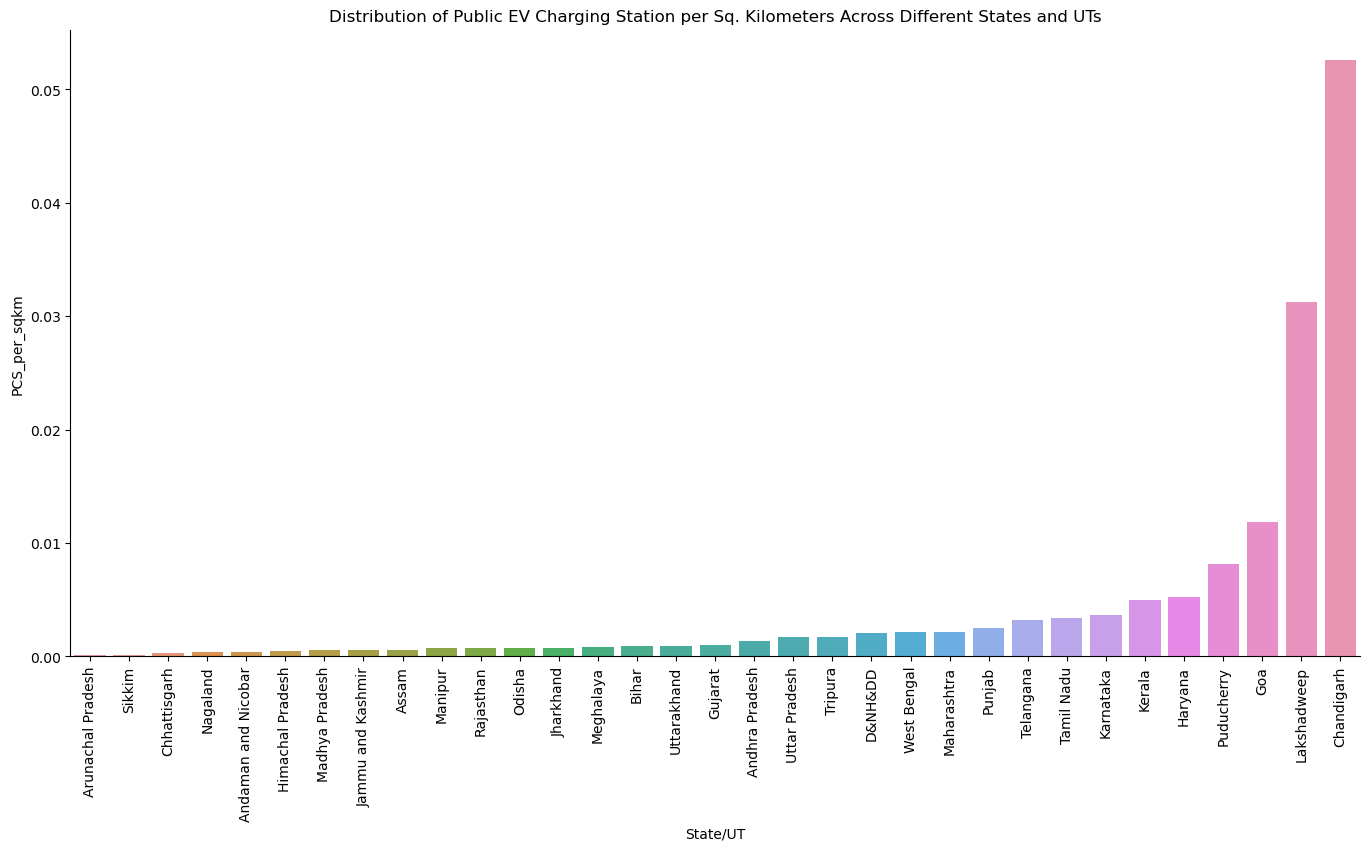

In [9]:
sns.catplot(
    kind='bar',
    data=data_charging_station[data_charging_station['State/UT']  != 'Delhi'].sort_values(
        by='PCS_per_sqkm'
    ),
    x='State/UT',
    y='PCS_per_sqkm',
    height=7,
    aspect=2
)
plt.xticks(rotation=90)
plt.title('Distribution of Public EV Charging Station per Sq. Kilometers Across Different States and UTs')
plt.show()

In [10]:
# states are sorted accoring to number of EV charging points that they have
sorted_state = data_charging_station.sort_values(
        by='No. of Operational PCS'
)['State/UT']

#### State and UT-wise petrol and diesel prices
Using this feature, because if in a given state, the price of petrol and diesel high, then the people will be more prone to use EVs

In [11]:
data_fuel_price = pd.read_csv('../Dataset/state_petrol_diesel_price.csv', index_col=0)
data_fuel_price.sample(5)

,State/UT,Reference City,Petrol (Rs./Litre),Diesel (Rs./Litre)
Sl. No.,,,,
23,Delhi,Delhi,96.72,89.62
2,Andhra Pradesh,Amaravati,111.87,99.61
36,Mizoram,Aizawl,95.88,82.27
29,Nagaland,Kohima,99.51,87.59
33,Meghalaya,Shillong,97.49,85.72


As we can notice from the above sample table, the prices are given using certain cities as references from each state, so we will take the mean value of cities of each state to obtain the mean price of petrol and diesel in that state

In [12]:
data_fuel_price = data_fuel_price.groupby('State/UT')[['Petrol (Rs./Litre)', 'Diesel (Rs./Litre)']].mean()
data_fuel_price = data_fuel_price.reset_index()
data_fuel_price.sample(3)

,State/UT,Petrol (Rs./Litre),Diesel (Rs./Litre)
16,Kerala,109.73,98.53
19,Madhya Pradesh,108.65,93.90
8,Delhi,96.72,89.62


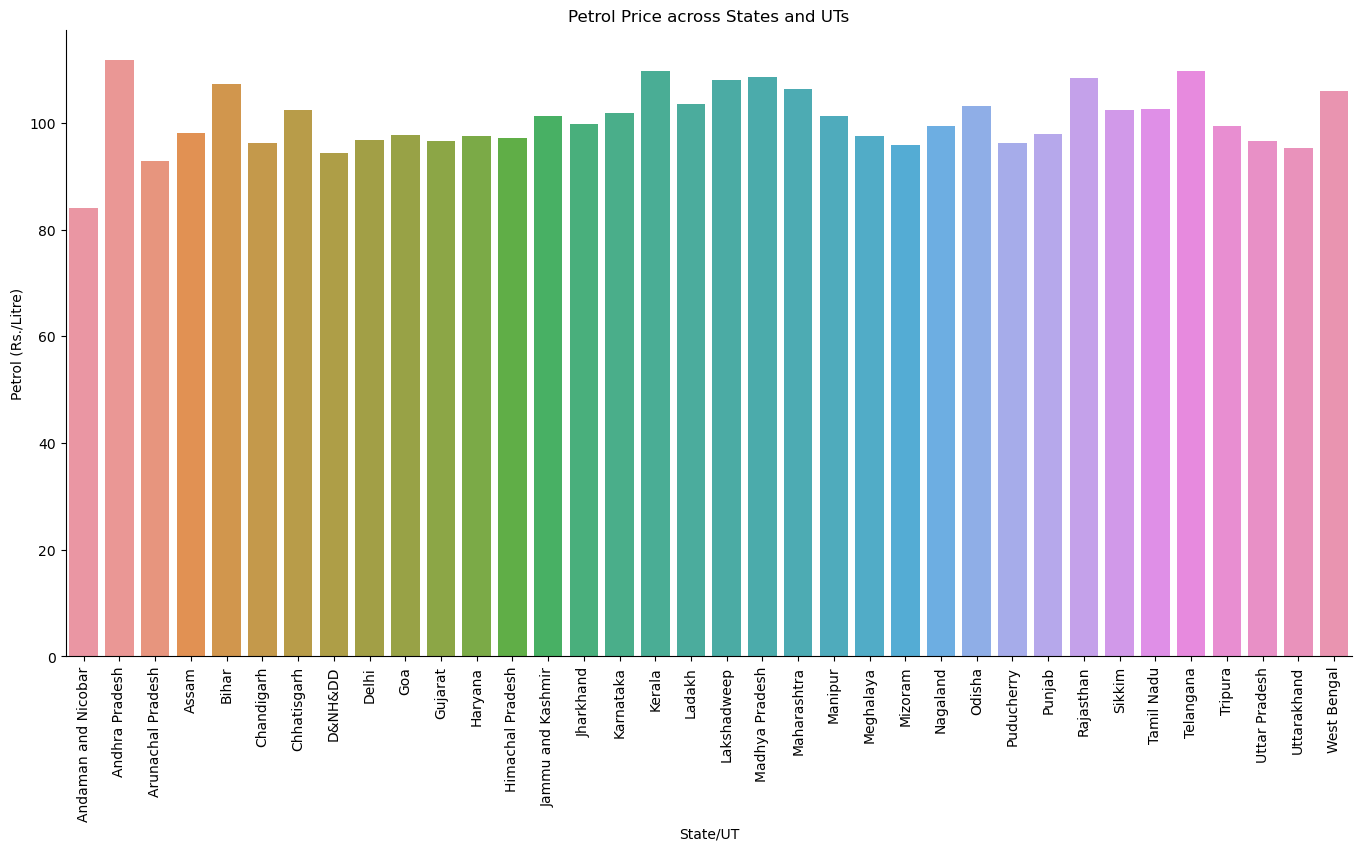

In [13]:
sns.catplot(
    kind='bar',
    data=data_fuel_price,
    x='State/UT',
    y='Petrol (Rs./Litre)',
    height=7,
    aspect=2
)
plt.xticks(rotation=90)
plt.title('Petrol Price across States and UTs')
plt.show()

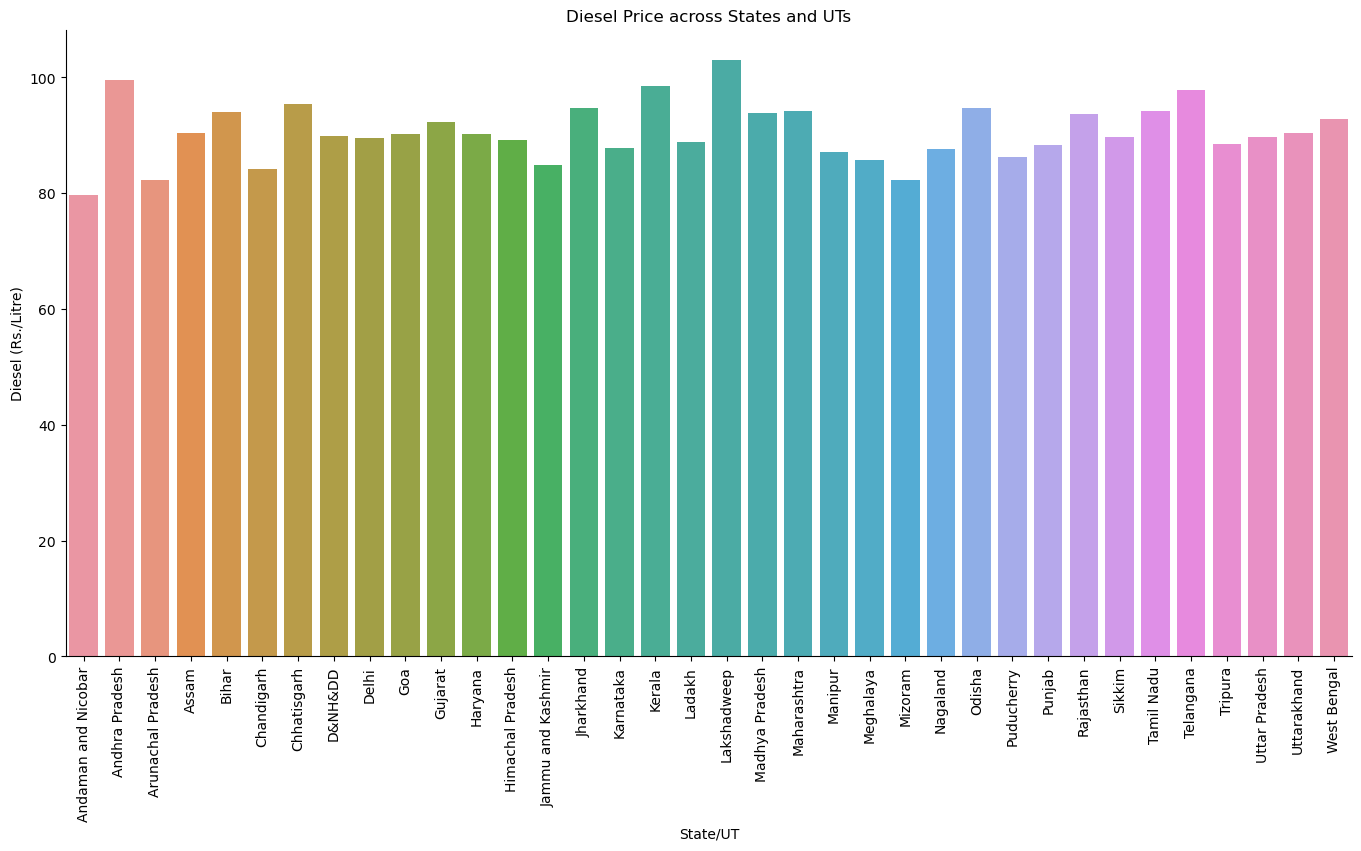

In [14]:
sns.catplot(
    kind='bar',
    data=data_fuel_price,
    x='State/UT',
    y='Diesel (Rs./Litre)',
    height=7,
    aspect=2
)
plt.xticks(rotation=90)
plt.title('Diesel Price across States and UTs')
plt.show()

In [15]:
data_fuel_price_long_format = pd.melt(
    data_fuel_price,
    id_vars=['State/UT'],
    value_vars=['Petrol (Rs./Litre)', 'Diesel (Rs./Litre)'],
    var_name='Fuel Type',
    value_name='Fuel Price(Rs./Litre)'
).replace(['Petrol (Rs./Litre)', 'Diesel (Rs./Litre)'], ['Petrol', 'Diesel'])

data_fuel_price_long_format.sample(frac=0.1)

,State/UT,Fuel Type,Fuel Price(Rs./Litre)
17,Ladakh,Petrol,103.59
37,Andhra Pradesh,Diesel,99.61
0,Andaman and Nicobar,Petrol,84.10
8,Delhi,Petrol,96.72
33,Uttar Pradesh,Petrol,96.57
1,Andhra Pradesh,Petrol,111.87
3,Assam,Petrol,98.03


In [16]:
# adding another column for mean fuel price which will be the mean price of petrol and diesel
data_state_wise_fuel_mean = pd.pivot_table(
    data_fuel_price_long_format,
    index='State/UT',
    values='Fuel Price(Rs./Litre)',
    aggfunc='mean'
).rename(
    columns={
        'Fuel Price(Rs./Litre)' : 'Mean Price'
    }
)
data_state_wise_fuel_mean.sample(frac=0.1)

,Mean Price
State/UT,
Lakshadweep,105.570
Punjab,93.175
Madhya Pradesh,101.275
Telangana,103.740


In [17]:
fuel_price_data = pd.merge(data_fuel_price_long_format, data_state_wise_fuel_mean, on='State/UT', how='inner')
fuel_price_data.head(5)

,State/UT,Fuel Type,Fuel Price(Rs./Litre),Mean Price
0,Andaman and Nicobar,Petrol,84.10,81.92
1,Andaman and Nicobar,Diesel,79.74,81.92
2,Andhra Pradesh,Petrol,111.87,105.74
3,Andhra Pradesh,Diesel,99.61,105.74
4,Arunachal Pradesh,Petrol,92.78,87.49


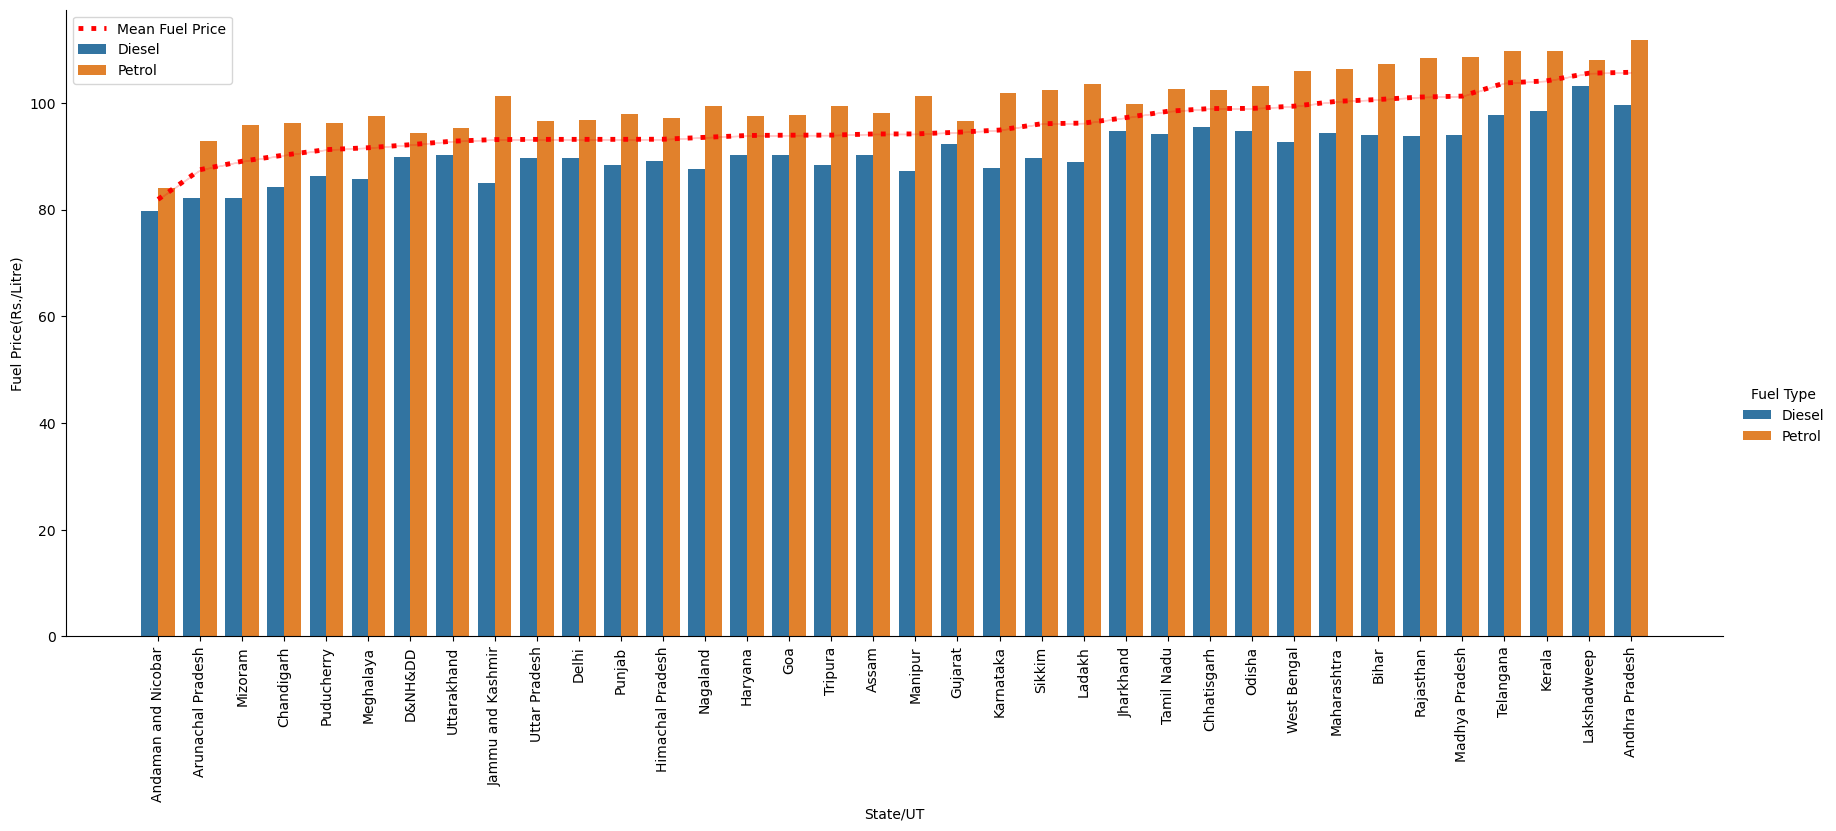

In [18]:
sns.catplot(
    kind='bar',
    data=fuel_price_data.sort_values(
        by='Mean Price'
    ),
    y='Fuel Price(Rs./Litre)',
    x='State/UT',
    hue='Fuel Type',
    height=7,
    aspect=2.5
)
plt.xticks(rotation=90)
sns.lineplot(
   data=fuel_price_data.sort_values(
        by='Mean Price'
    ),
    y='Mean Price',
    x='State/UT',
    linestyle='dotted',
    linewidth=3.5,
    label='Mean Fuel Price',
    color='red'
)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='State/UT', ylabel='Mean Price'>

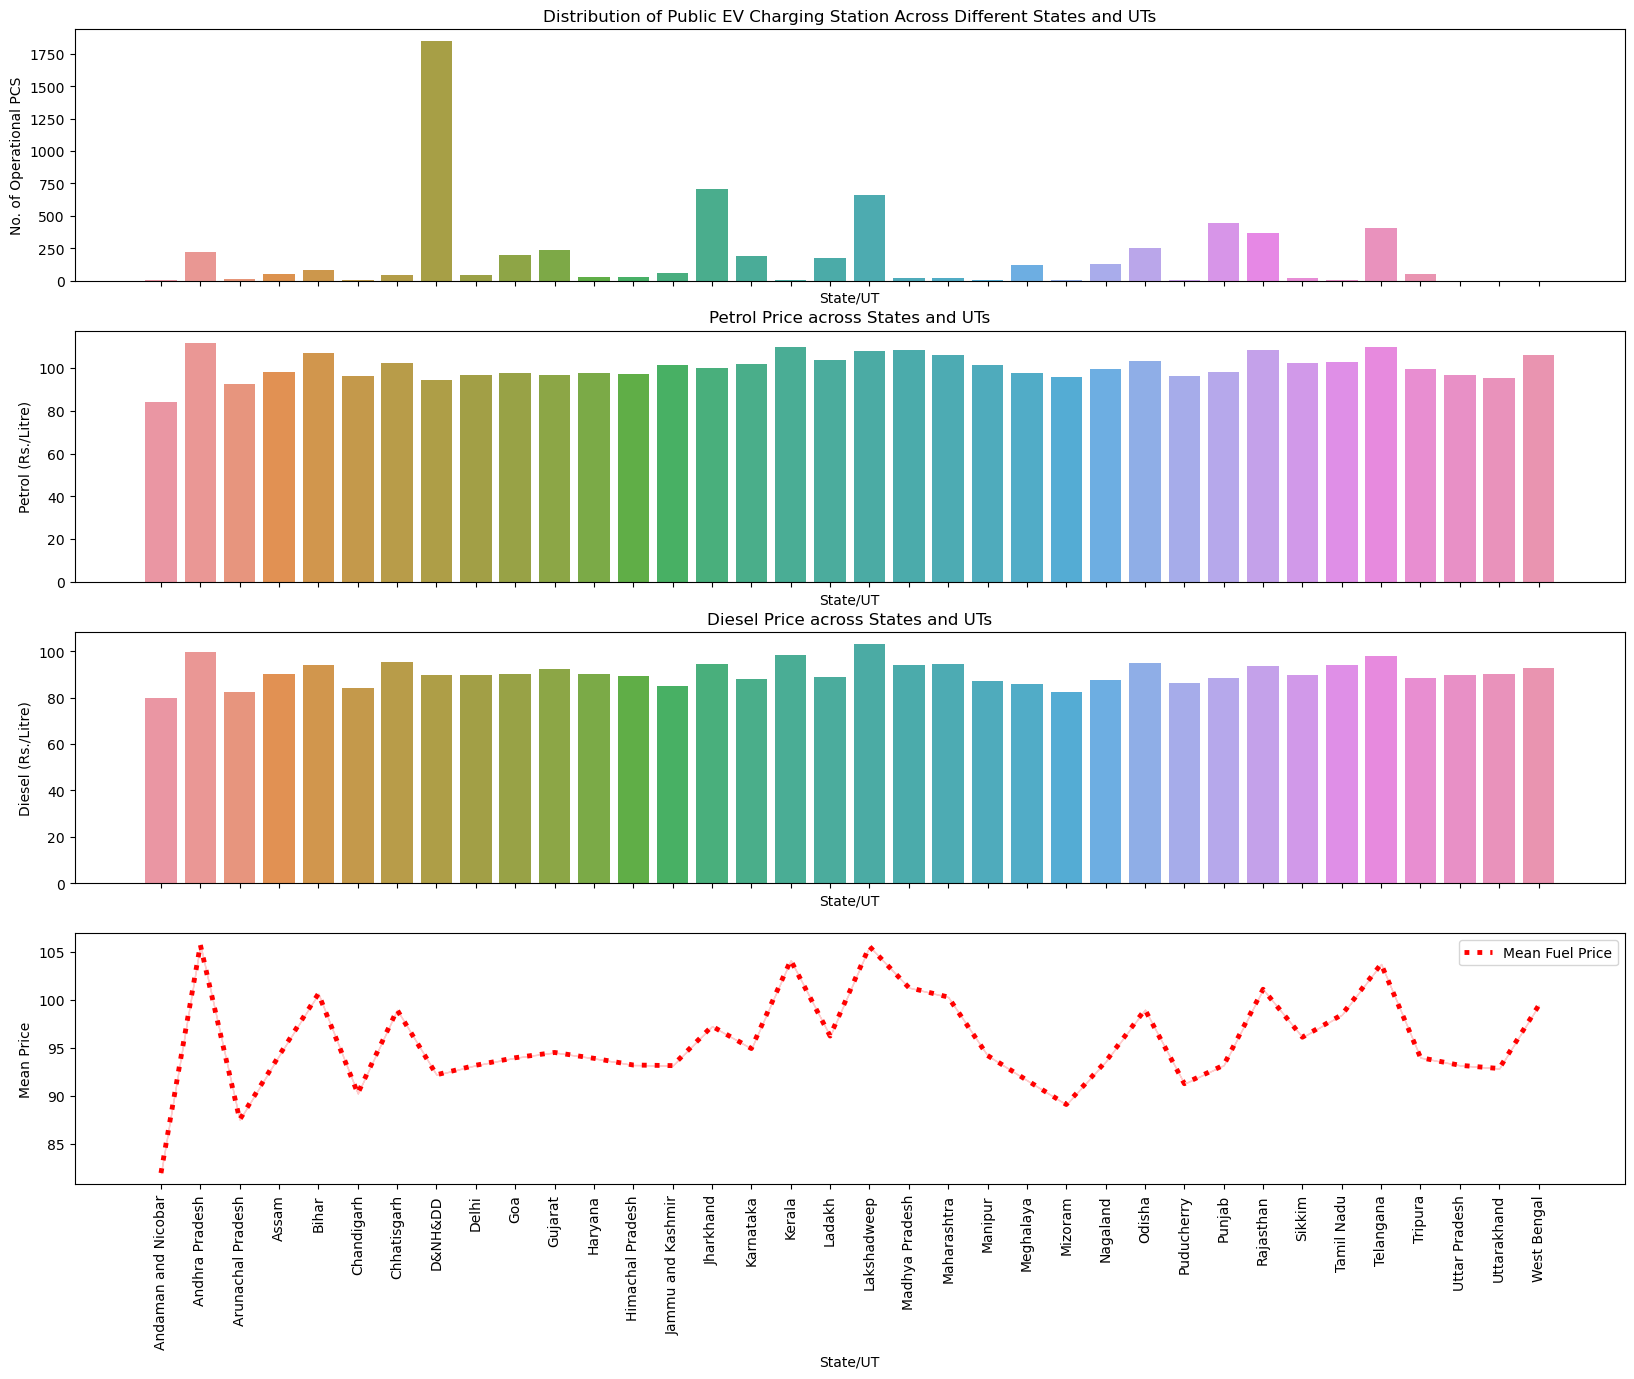

In [19]:
fig, ax = plt.subplots(
    nrows=4,
    sharex=True,
    figsize=[20, 15]
)


# no of ev charging station across states
sns.barplot(
    ax=ax[0],
    data=data_charging_station.iloc[:-1,:],
    x='State/UT',
    y='No. of Operational PCS'
)
plt.xticks(rotation=90)
ax[0].set_title('Distribution of Public EV Charging Station Across Different States and UTs')


# price of petrol across states and UTs
sns.barplot(
    ax=ax[1],
    data=data_fuel_price,
    x='State/UT',
    y='Petrol (Rs./Litre)'
)
plt.xticks(rotation=90)
ax[1].set_title('Petrol Price across States and UTs')


# price of diesel across stats and UTs
sns.barplot(
    ax=ax[2],
    data=data_fuel_price,
    x='State/UT',
    y='Diesel (Rs./Litre)'
)
plt.xticks(rotation=90)
ax[2].set_title('Diesel Price across States and UTs')

sns.lineplot(
    ax=ax[3],
   data=fuel_price_data,
    y='Mean Price',
    x='State/UT',
    linestyle='dotted',
    linewidth=3.5,
    label='Mean Fuel Price',
    color='red'
)

Normalizing mean fuel price and number of EV charging stations so that we can visualize it in a same plot

In [20]:
data_charging_station['Normalized no of charging stations'] = StandardScaler().fit_transform(data_charging_station[['No. of Operational PCS']])

fuel_price_data['Normalized Price'] =StandardScaler().fit_transform(fuel_price_data[['Mean Price']])

In [21]:
temp = pd.merge(data_charging_station, fuel_price_data, on='State/UT', how='inner').drop_duplicates('State/UT')
temp.sample(3)

,State/UT,No. of Operational PCS,Area (km2),PCS_per_sqkm,Normalized no of charging stations,Fuel Type,Fuel Price(Rs./Litre),Mean Price,Normalized Price
54,Telangana,365,112077,0.003257,0.505010,Petrol,109.66,103.740,1.595524
48,Rajasthan,254,342239,0.000742,0.177759,Petrol,108.48,101.100,1.074926
44,Puducherry,4,492,0.008130,-0.559291,Petrol,96.16,91.245,-0.868445


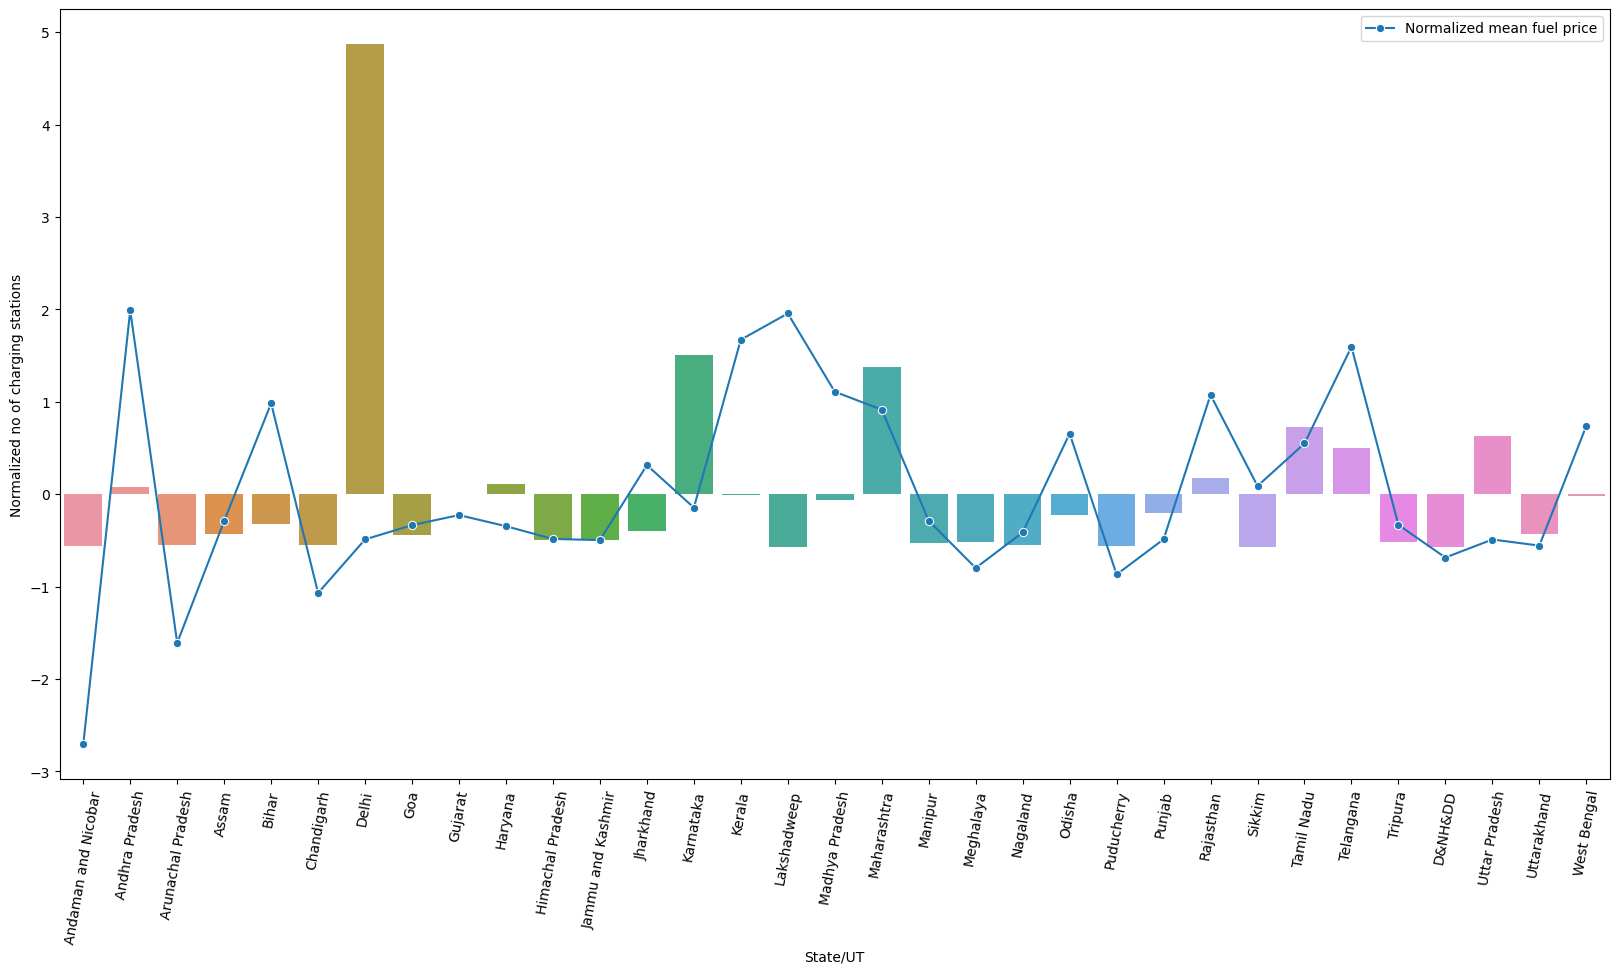

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=temp,
    x='State/UT',
    y='Normalized Price',
    marker='o',
    label='Normalized mean fuel price'
)
sns.barplot(
    data=temp,
    x='State/UT',
    y='Normalized no of charging stations'
)
plt.xticks(rotation=80)
plt.legend()
plt.show()

Here, from the above plot, we can notice that, in Delhi, there is highest number of publicly available EV charging stations; so it can prove to be a good market for EV start-ups. After Delhi, Karnataka, Maharashtra, Tamilnadu and Uttar Pradesh dominates the EV market, in order. But among all of these 5 states, Karataka has been found out to be the state where the mean price for petrol and diesel is very high. It might mean that, people will be more prone to buy EVs if it could be launched at a reasonable price.

# Psychographic and Geoghraphic Segmentation

Using the state-UT wise EV and non-EV dataset, we can get an idea of how popular EVs are in each state, it is an indication of how people of those states are adapting to EVs

In [23]:
ev_nonev_data = pd.read_csv('../Dataset/state_ev_non-ev_count.csv', index_col=0)

# the last column entry is grand total, so we will discard it
ev_nonev_data = ev_nonev_data.iloc[:-1,:]
ev_nonev_data.head()

,State/UT,Electric,Non-electric
Sl.No.,,,
1,Andaman and Nicobar,190,161258
2,Andhra Pradesh,67905,16553509
3,Arunachal Pradesh,28,303673
4,Assam,120423,5312457
5,Bihar,161060,11631081


In [24]:
ev_nonev_data['Total Vehicles'] = ev_nonev_data['Electric'] + ev_nonev_data['Non-electric']
ev_nonev_data['fraction of EV'] = ev_nonev_data['Electric']/ev_nonev_data['Total Vehicles']
ev_nonev_data.head()

,State/UT,Electric,Non-electric,Total Vehicles,fraction of EV
Sl.No.,,,,,
1,Andaman and Nicobar,190,161258,161448,0.001177
2,Andhra Pradesh,67905,16553509,16621414,0.004085
3,Arunachal Pradesh,28,303673,303701,0.000092
4,Assam,120423,5312457,5432880,0.022166
5,Bihar,161060,11631081,11792141,0.013658


In [25]:
# normalizing the data for the ease of comparison
ev_nonev_data['Normalized Total Vehicles'] = StandardScaler().fit_transform(ev_nonev_data[['Total Vehicles']])
ev_nonev_data['Normalized fraction of EV'] = StandardScaler().fit_transform(ev_nonev_data[['fraction of EV']])

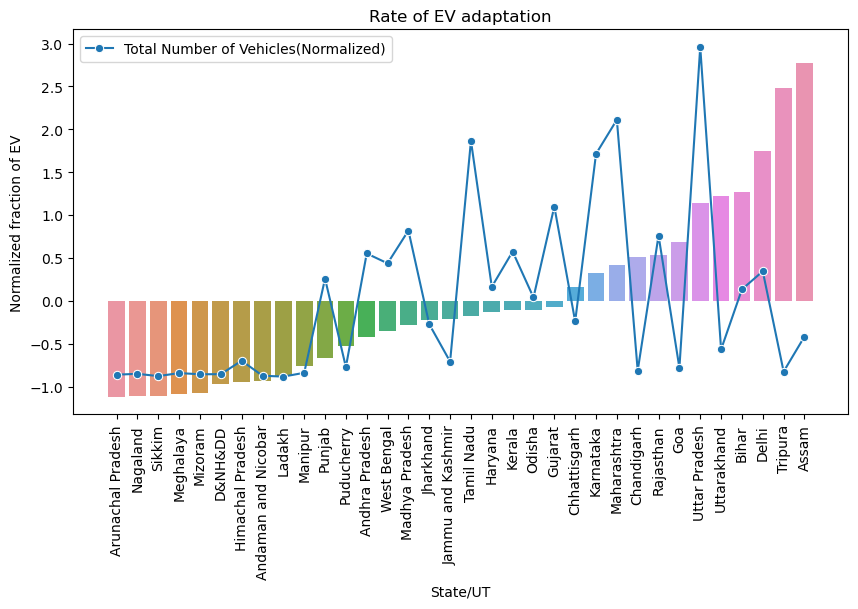

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=ev_nonev_data.sort_values('fraction of EV'),
    x='State/UT',
    y='Normalized fraction of EV'
)
sns.lineplot(
    data=ev_nonev_data.sort_values('fraction of EV'),
    x='State/UT',
    y='Normalized Total Vehicles',
    label='Total Number of Vehicles(Normalized)',
    marker='o'
)
plt.title('Rate of EV adaptation')
plt.legend()
plt.xticks(rotation=90)
plt.show()

From above observation, we can see that the ratio of EV to total vehicles is highest in Assam followed by Tripura, Delhi, Bihar, Uttrakhand. But we can also notice that the total number of vehicles in Assam, Tripura is very low compared to that in Delhi, Bihar, Uttarakhand. Following this observation, we can say that the EV adaption rate is pretty high in Assam, Tripura. But in case of Uttarpradesh, we can assume that EV adaption rate is low.

In [27]:
temp = pd.merge(temp, ev_nonev_data, on='State/UT', how='inner').sort_values('Normalized fraction of EV')
temp.sample(5)

,State/UT,No. of Operational PCS,Area (km2),PCS_per_sqkm,Normalized no of charging stations,Fuel Type,Fuel Price(Rs./Litre),Mean Price,Normalized Price,Electric,Non-electric,Total Vehicles,fraction of EV,Normalized Total Vehicles,Normalized fraction of EV
24,Sikkim,1,7096,0.000141,-0.568136,Petrol,102.50,96.10,0.088944,20,109988,110008,0.000182,-0.878029,-1.105537
19,Nagaland,6,16579,0.000362,-0.553395,Petrol,99.51,93.55,-0.413907,62,418529,418591,0.000148,-0.851298,-1.111474
29,Uttarakhand,48,53483,0.000897,-0.429571,Petrol,95.33,92.83,-0.555889,49491,3647377,3696868,0.013387,-0.567321,1.221437
14,Kerala,192,38863,0.004940,-0.005029,Petrol,109.73,104.13,1.672431,98332,16781110,16879442,0.005826,0.574607,-0.111037
1,Andhra Pradesh,222,162968,0.001362,0.083417,Petrol,111.87,105.74,1.989917,67905,16553509,16621414,0.004085,0.552255,-0.417675


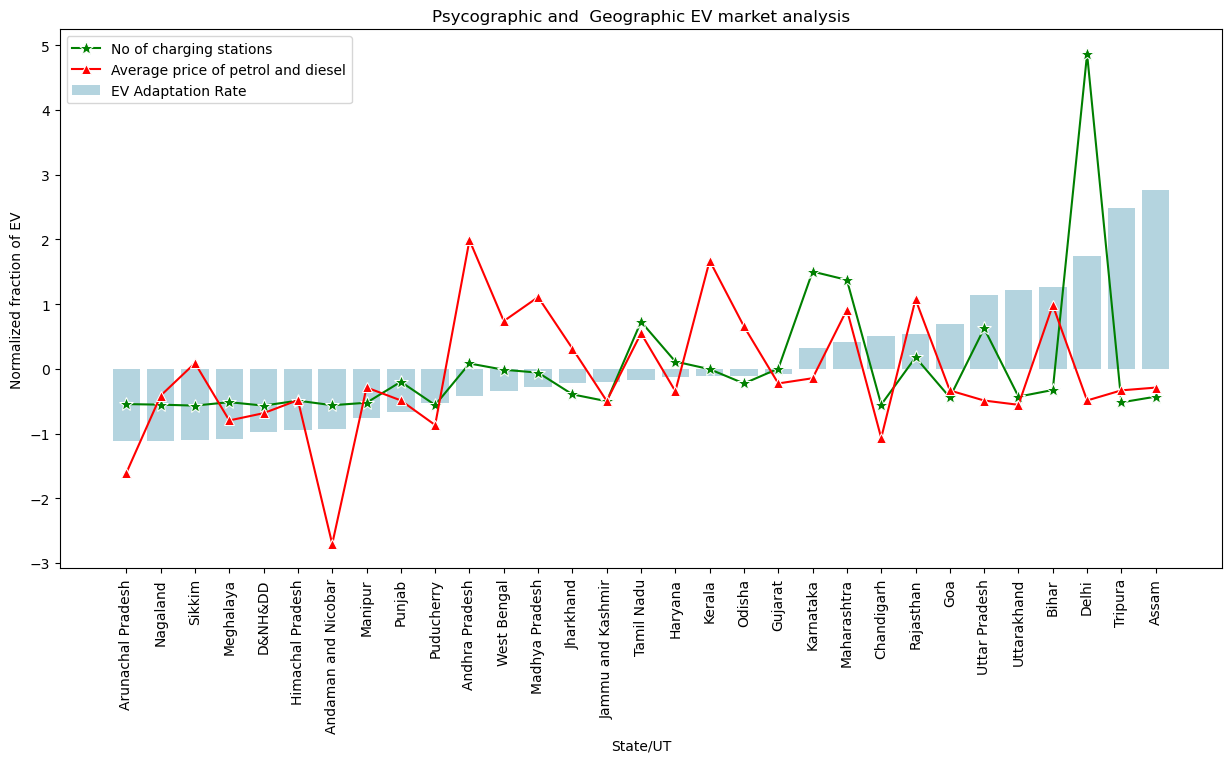

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(
    data=temp,
    x='State/UT',
    y='Normalized fraction of EV',
    label='EV Adaptation Rate',
    color='lightblue'
)
sns.lineplot(
    data=temp,
    x='State/UT',
    y='Normalized no of charging stations',
    label='No of charging stations',
    marker='*',
    markersize=10,
    color='green'   
)
sns.lineplot(
    data=temp,
    x='State/UT',
    y='Normalized Price',
    label='Average price of petrol and diesel',
    marker='^',
    markersize=7,
    color='red'   
)
plt.title('Psycographic and  Geographic EV market analysis')
plt.xticks(rotation=90)
plt.show()

In the above graph, the bar plots show the adaption rate of EVs in each state. Adaption rate is calculated as (number of EVs in a state / total number of vehicles in a state). In Assam, the EV adaption rate is the highest, followed by Tripura and Delhi. Even though the adaption rate for EV is very high in Assam, there are very few public EV charging stations in Assam, so it might not prove to be a very good market for EV start-ups. But if, the number of PCS increases, then it will be a good market for EV.
EV adaption rate is not very high in Rajasthan, but the rate of petrol and diesel is very high, because of which, people in Rajasthan might eventually prefer to buy EVs if they are sold at a reasonable price. The same is true for Kerala, Andhra Pradesh, Maharasthra.

So, Delhi should be the first choice of the EV start-up but the EVs must be launched at a very reasonable price in order to be able to compete with other companies, following Delhi, Uttar Pradesh, Goa, Rajasthan might be a good choice at initial period and then eventually the company may expand its business in Maharashtra, Kerala, Andhra Pradesh, Assam, Tripura.

# Psychographic Segmentation

In [29]:
car_type_growth_data = pd.read_csv('../Dataset/yearwise_car_growth.csv')
car_type_growth_data = car_type_growth_data.iloc[:-1,:]
car_type_growth_data.head()

,Category,Segment,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-2011,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles (PVs),Passenger Cars,500301.0,557410.0,782562.0,960487.0,1046133.0,1238032,1426212,1516967,1932620,2453113.0,2775124.0,2668633.0,2519281.0,2590917.0
1,Passenger Vehicles (PVs),Multi-Utility Vehicles,169418.0,165920.0,206998.0,249389.0,263167.0,307202,351371,321626,424791,534183.0,370945.0,564928.0,568692.0,629255.0
2,Passenger Vehicles (PVs),Total Passenger Vehicles (PVs),669719.0,723330.0,989560.0,1209876.0,1309300.0,1545234,1777583,1838593,2357411,2987296.0,3146069.0,3233561.0,3087973.0,3220172.0
3,Commercial Vehicles - M & HCVs,Passenger Carriers,20283.0,21156.0,27628.0,30419.0,28982.0,32828,46542,40995,46026,54552.0,54156.0,50024.0,41175.0,49360.0
4,Commercial Vehicles - M & HCVs,Goods Carriers,76469.0,99346.0,138495.0,184388.0,190313.0,261438,248415,151288,204145,289990.0,330645.0,228536.0,180381.0,219193.0


In [30]:
car_type_growth_data['Segment'].unique()

array(['Passenger Cars', 'Multi-Utility Vehicles',
       'Total Passenger Vehicles (PVs)', 'Passenger Carriers',
       'Goods Carriers', 'Total M & HCVs', 'Total LCVs',
       'Total Commercial Vehicles (CVs)', 'Total Three Wheelers',
       'Scooter/Scooterettee', 'Motorcycles/Step-Throughs', 'Mopeds',
       'Electric Two Wheelers', 'Total Two Wheelers'], dtype=object)

In [31]:
car_type_growth_data.drop(columns='Segment', inplace=True)

In [32]:
car_type_growth_data = car_type_growth_data.groupby('Category').sum().T.reset_index().rename(
    columns={
        'index':'Year'
    }
)
car_type_growth_data.head()

Category,Year,Commercial Vehicles (CVs),Commercial Vehicles - LCVs,Commercial Vehicles - M & HCVs,Passenger Vehicles (PVs),Three Wheelers,Two Wheelers
0,2001-02,162508.0,131512.0,193504.0,1339438.0,425496.0,8542654.0
1,2002-03,203697.0,166390.0,241004.0,1446660.0,553438.0,10152442.0
2,2003-04,275040.0,217834.0,332246.0,1979120.0,712446.0,11245482.0
3,2004-05,353703.0,277792.0,429614.0,2419752.0,748890.0,13059658.0
4,2005-06,391083.0,343576.0,438590.0,2618600.0,868846.0,15217394.0


In [33]:
car_categories = car_type_growth_data.columns.to_list()
car_categories.remove('Year')
car_categories

['Commercial Vehicles (CVs)',
 'Commercial Vehicles - LCVs',
 'Commercial Vehicles - M & HCVs',
 'Passenger Vehicles (PVs)',
 'Three Wheelers',
 'Two Wheelers']

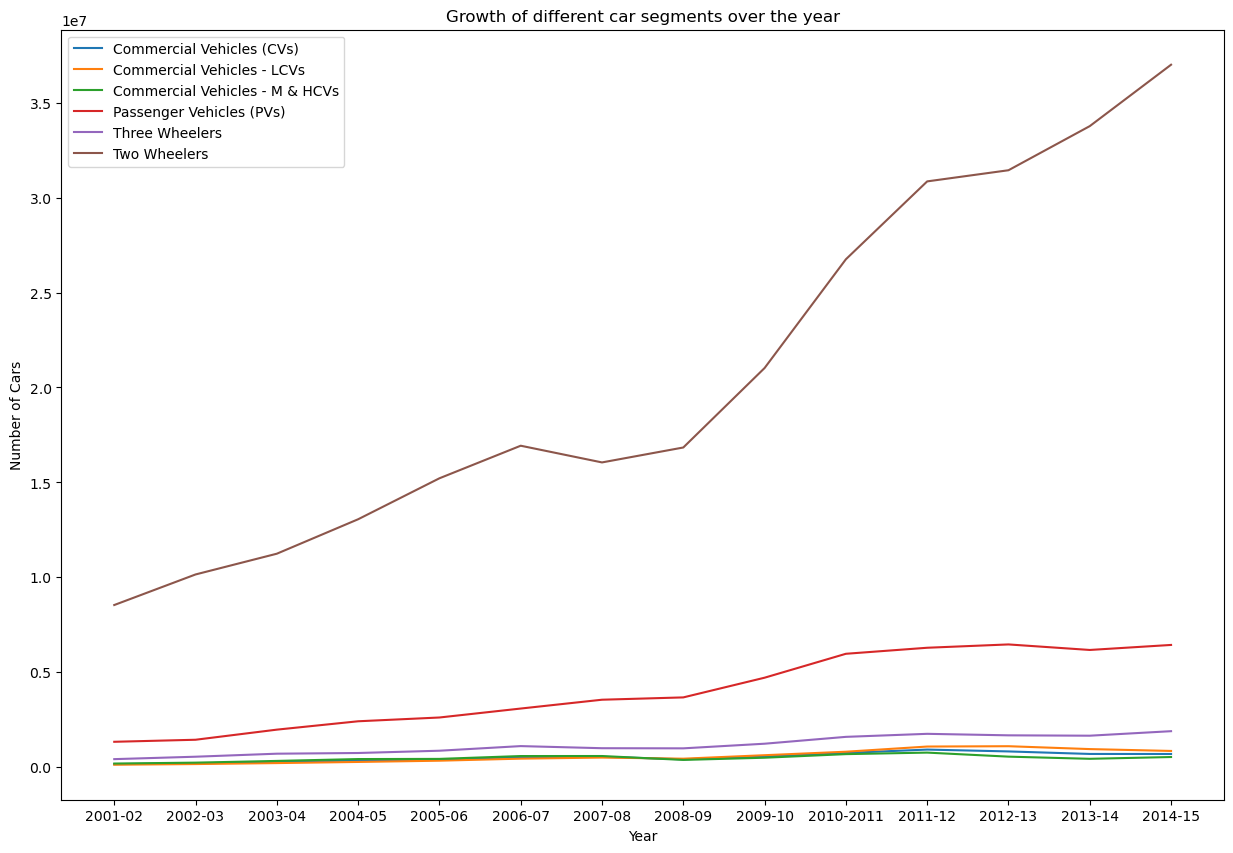

In [34]:
plt.figure(figsize=(15,10))
for i in car_categories:
    sns.lineplot(
        data=car_type_growth_data,
        x='Year',
        y=i,
        label=i
    )
plt.legend()
plt.title('Growth of different car segments over the year')
plt.ylabel('Number of Cars')
plt.show()

The company should target two wheelers and passenger vehicles as there is huge growth in these two segments over the years.

# Segmenation of EV market based on the features of EV

In [35]:
data = pd.read_csv(r"../Dataset/indian_ev_details.csv")
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Range (km/hr),Fast Charging,Number of Seats,Type of brakes,Type of Vehicle
0,Revolt RV400,Revolt Motors,RV400,85,134000.0,Electric,Two Wheeler,4.0,4.5,150.0,YES,2,Disc,Motor cycles
1,Revolt RV300,Revolt Motors,RV300,65,94999.0,Electric,Two Wheeler,2.7,4.2,180.0,YES,2,Disc,Motor cycles
2,Tork Motors(Kratos ),Tork Motors,Kratos,100,192499.0,Electric,Two Wheeler,4.0,5.0,180.0,NO,2,Disc,Motor cycles
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105,207499.0,Electric,Two Wheeler,4.0,5.0,180.0,YES,2,Disc,Motor cycles
4,Oben Rorr,Kabira Mobility,Oben Rorr,100,102999.0,Electric,Two Wheeler,4.4,2.0,200.0,YES,2,Disc,Motor cycles


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle full name        143 non-null    object 
 1   Manufacturing            143 non-null    object 
 2   Model                    143 non-null    object 
 3   Top speed (km/hr)        143 non-null    int64  
 4   Price (INR)              129 non-null    float64
 5   Fuel Type                143 non-null    object 
 6   Wheelers type            143 non-null    object 
 7   Battery capacity [kWh]   134 non-null    float64
 8   Full charging time (HR)  112 non-null    float64
 9   Range (km/hr)            140 non-null    float64
 10  Fast Charging            143 non-null    object 
 11   Number of Seats         143 non-null    int64  
 12  Type of brakes           126 non-null    object 
 13  Type of Vehicle          143 non-null    object 
dtypes: float64(4), int64(2), o

In [37]:
data.isna().sum()

Vehicle full name           0
Manufacturing               0
Model                       0
Top speed (km/hr)           0
Price (INR)                14
Fuel Type                   0
Wheelers type               0
Battery capacity [kWh]      9
Full charging time (HR)    31
Range (km/hr)               3
Fast Charging               0
 Number of Seats            0
Type of brakes             17
Type of Vehicle             0
dtype: int64

There is a good amount of null values in the dataframe that we need to take care of while further analysis

In [38]:
data['Wheelers type'].value_counts()

Wheelers type
four Wheeler     62
Two Wheeler      37
Four Wheeler     27
Eight Wheeler    11
Three Wheeler     6
Name: count, dtype: int64

In [39]:
data['Wheelers type'].replace(
    {
        'four wheeler':'Four Wheeler',
        'four Wheeler':'Four Wheeler'
        
    },
    inplace=True
)

In [40]:
data['Wheelers type'].unique()

array(['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Eight Wheeler'],
      dtype=object)

In [41]:
data['Fast Charging'].value_counts()

Fast Charging
YES    123
Yes     11
NO       8
No       1
Name: count, dtype: int64

In [42]:
data['Fast Charging'].replace(
    {
        'YES':'Yes',
        'NO':'No'
    },
    inplace=True
)

In [43]:
data['Fuel Type'].value_counts()

Fuel Type
Electric    120
Hybrid       14
electric      9
Name: count, dtype: int64

In [44]:
data['Fuel Type'].replace('electric', 'Electric', inplace=True)

Checking the distribution of EV prices

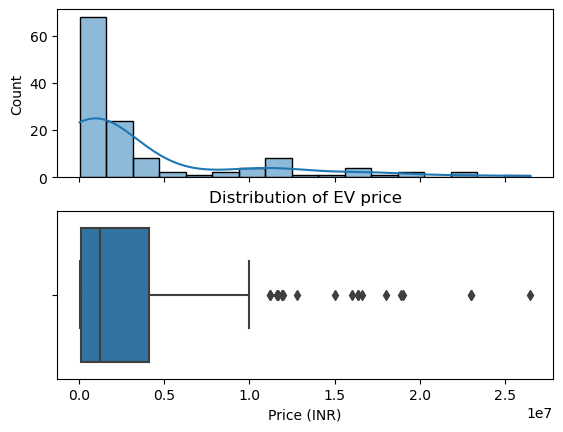

In [45]:
fig, ax = plt.subplots(nrows=2, sharex=True)
sns.histplot(
    ax=ax[0],
    kde=True,
    data=data,
    x='Price (INR)'
)
sns.boxplot(
    ax=ax[1],
    data=data,
    x='Price (INR)'
)
plt.title('Distribution of EV price')
plt.show()

As we can see, most EVs are priced pretty low, while there are certain EVs whose price is considerably very high

As the price is a continuous variable, we will convert it into categorical variable by performing certain discretization which will also cause slight loss of information. But before performing this, we will impute the null values in Price using the mean of the respective vehicle type, that means, null price for a two wheeler will be imputed using mean of two wheeler price, while null price for a bus will be imputed using mean of bus price

In [46]:
'''
for vehicle in data['Type of Vehicle'].unique():
    filter = data['Type of Vehicle'] == vehicle
    category_mean  = data[filter]['Price (INR)'].mean()
    data[filter]['Price (INR)'] =  data[filter]['Price (INR)'].fillna(category_mean)
'''
data['Price (INR)'].fillna(data['Price (INR)'].mean(), inplace=True)
data['Price (INR)'].isna().sum()

0

In [47]:
def discretize_price(price):
    if price < 1e5:
        return "Less than Lakh"
    elif price >= 1e5 and price < 1e7:
        return "In Lakhs"
    else:
        return "More than Lakhs"

In [48]:
data["Price Category"] = data['Price (INR)'].apply(discretize_price)
data['Price Category'].value_counts()

Price Category
In Lakhs           101
More than Lakhs     22
Less than Lakh      20
Name: count, dtype: int64

Filling the rest of the missing values

In [49]:
data['Top speed (km/hr)'].fillna(data['Top speed (km/hr)'].mean(), inplace=True)

data['Battery capacity [kWh]'].fillna(data['Battery capacity [kWh]'].mean(), inplace=True)

data['Full charging time (HR)'].fillna(data['Full charging time (HR)'].mean(), inplace=True)

data['Range (km/hr)'].fillna(data['Range (km/hr)'].mean(), inplace=True)

data['Type of brakes'].fillna(data['Type of brakes'].mode()[0], inplace=True)

#### Type of Vehicles that are mostly in use

In [50]:
temp = data['Type of Vehicle'].value_counts().reset_index()
temp

,Type of Vehicle,count
0,Cars,89
1,Scooters,24
2,Motor cycles,13
3,Bus,11
4,Rickshaws,4
5,Cargo three Wheeler,2


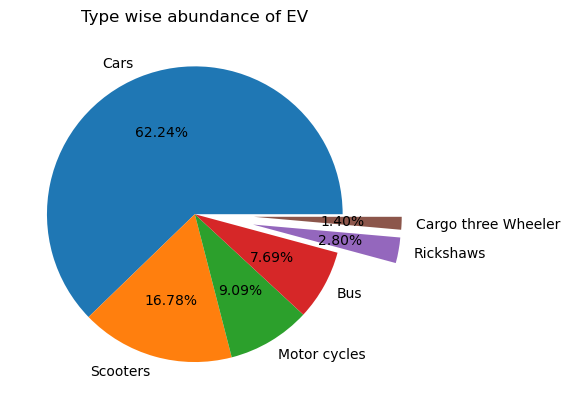

In [51]:
plt.title("Type wise abundance of EV")
plt.pie(
    temp['count'],
    labels=temp['Type of Vehicle'],
    autopct='%.2f%%',
    explode=[0, 0, 0, 0, 0.4, 0.4]
)
plt.show()

#### Converting the textual features into numerical features

In [52]:
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Range (km/hr),Fast Charging,Number of Seats,Type of brakes,Type of Vehicle,Price Category
0,Revolt RV400,Revolt Motors,RV400,85,134000.0,Electric,Two Wheeler,4.0,4.5,150.0,Yes,2,Disc,Motor cycles,In Lakhs
1,Revolt RV300,Revolt Motors,RV300,65,94999.0,Electric,Two Wheeler,2.7,4.2,180.0,Yes,2,Disc,Motor cycles,Less than Lakh
2,Tork Motors(Kratos ),Tork Motors,Kratos,100,192499.0,Electric,Two Wheeler,4.0,5.0,180.0,No,2,Disc,Motor cycles,In Lakhs
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105,207499.0,Electric,Two Wheeler,4.0,5.0,180.0,Yes,2,Disc,Motor cycles,In Lakhs
4,Oben Rorr,Kabira Mobility,Oben Rorr,100,102999.0,Electric,Two Wheeler,4.4,2.0,200.0,Yes,2,Disc,Motor cycles,In Lakhs


In [53]:
data = data.iloc[:,[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
data.head()

,Top speed (km/hr),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Range (km/hr),Fast Charging,Number of Seats,Type of brakes,Type of Vehicle,Price Category
0,85,Electric,Two Wheeler,4.0,4.5,150.0,Yes,2,Disc,Motor cycles,In Lakhs
1,65,Electric,Two Wheeler,2.7,4.2,180.0,Yes,2,Disc,Motor cycles,Less than Lakh
2,100,Electric,Two Wheeler,4.0,5.0,180.0,No,2,Disc,Motor cycles,In Lakhs
3,105,Electric,Two Wheeler,4.0,5.0,180.0,Yes,2,Disc,Motor cycles,In Lakhs
4,100,Electric,Two Wheeler,4.4,2.0,200.0,Yes,2,Disc,Motor cycles,In Lakhs


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

transformer = ColumnTransformer(
    transformers=[
        (
            'ohe', OneHotEncoder(
            sparse_output=False,
            drop='first'
        ), [1,8,9]),
        (
            'ordinal', OrdinalEncoder(
            categories=[
                ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Eight Wheeler'],
                ['No', 'Yes'],
                ['Less than Lakh','In Lakhs', 'More than Lakhs']
            ]
        ), [2, 6,-1]),
        ('scaler', StandardScaler(), [0,3,4,5,7])
    ],
    remainder='passthrough'
).set_output(transform='pandas')

data_transformed = transformer.fit_transform(data)
data_transformed.head()

,ohe__Fuel Type_Hybrid,ohe__Type of brakes_Disc,ohe__Type of brakes_disc (front + rear),ohe__Type of brakes_disc (front) + drum (rear),ohe__Type of brakes_front disc brakes,ohe__Type of Vehicle_Cargo three Wheeler,ohe__Type of Vehicle_Cars,ohe__Type of Vehicle_Motor cycles,ohe__Type of Vehicle_Rickshaws,ohe__Type of Vehicle_Scooters,ordinal__Wheelers type,ordinal__Fast Charging,ordinal__Price Category,scaler__Top speed (km/hr),scaler__Battery capacity [kWh],scaler__Full charging time (HR),scaler__Range (km/hr),scaler__ Number of Seats
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.628273,-0.845921,-0.533021,-0.646257,-0.523653
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.920114,-0.876318,-0.589228,-0.510799,-0.523653
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.409393,-0.845921,-0.439341,-0.510799,-0.523653
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.336433,-0.845921,-0.439341,-0.510799,-0.523653
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.409393,-0.836567,-1.001419,-0.420493,-0.523653


In [55]:
data_transformed.columns

Index(['ohe__Fuel Type_Hybrid', 'ohe__Type of brakes_Disc',
       'ohe__Type of brakes_disc (front + rear)',
       'ohe__Type of brakes_disc (front) + drum (rear)',
       'ohe__Type of brakes_front disc brakes',
       'ohe__Type of Vehicle_Cargo three Wheeler', 'ohe__Type of Vehicle_Cars',
       'ohe__Type of Vehicle_Motor cycles', 'ohe__Type of Vehicle_Rickshaws',
       'ohe__Type of Vehicle_Scooters', 'ordinal__Wheelers type',
       'ordinal__Fast Charging', 'ordinal__Price Category',
       'scaler__Top speed (km/hr)', 'scaler__Battery capacity [kWh]',
       'scaler__Full charging time (HR)', 'scaler__Range (km/hr)',
       'scaler__ Number of Seats'],
      dtype='object')

Renaming the columns for better understanding

In [56]:
new_col_names = [' Fuel Type_Hybrid', ' Type of brakes_Disc', ' Type of brakes_disc (front + rear)', ' Type of brakes_disc (front) + drum (rear)', ' Type of brakes_front disc brakes', ' Type of Vehicle_Cargo three Wheeler', ' Type of Vehicle_Cars', ' Type of Vehicle_Motor cycles', ' Type of Vehicle_Rickshaws', ' Type of Vehicle_Scooters', ' Wheelers type', ' Fast Charging', ' Price Category', ' Top speed (km/hr)', ' Battery capacity [kWh]', ' Full charging time (HR)', ' Range (km/hr)', '  Number of Seats']

In [57]:
data_transformed = pd.DataFrame(
    data_transformed.values,
    columns=new_col_names
)
data_transformed.head()

,Fuel Type_Hybrid,Type of brakes_Disc,Type of brakes_disc (front + rear),Type of brakes_disc (front) + drum (rear),Type of brakes_front disc brakes,Type of Vehicle_Cargo three Wheeler,Type of Vehicle_Cars,Type of Vehicle_Motor cycles,Type of Vehicle_Rickshaws,Type of Vehicle_Scooters,Wheelers type,Fast Charging,Price Category,Top speed (km/hr),Battery capacity [kWh],Full charging time (HR),Range (km/hr),Number of Seats
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.628273,-0.845921,-0.533021,-0.646257,-0.523653
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.920114,-0.876318,-0.589228,-0.510799,-0.523653
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.409393,-0.845921,-0.439341,-0.510799,-0.523653
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.336433,-0.845921,-0.439341,-0.510799,-0.523653
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.409393,-0.836567,-1.001419,-0.420493,-0.523653


####  Performing PCA

In [58]:
pc_list = []
for i in range(1, data_transformed.shape[1]+1):
    pc_list.append(f"PC{str(i)}")

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=data_transformed.shape[1])
pca_data = pca.fit_transform(data_transformed)
pca_data = pd.DataFrame(
    pca_data,
    columns=pc_list
)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-2.240320,-0.262739,-0.178636,-0.361332,0.451054,0.508441,0.287718,-0.656912,0.521161,0.115872,-0.071523,-0.178412,-0.035801,-0.046086,-0.011129,-0.005878,0.002596,-6.336559e-16
1,-2.552900,-0.115615,-0.157800,0.062609,0.566791,0.160180,0.096849,-0.065640,1.027142,-0.020560,-0.041629,-0.110761,0.006473,0.026301,-0.025088,0.001106,0.004904,-8.867994e-16
2,-2.070728,-0.445132,-0.215275,-0.356758,0.550352,0.635600,0.340501,-0.588815,0.503905,0.075101,0.915704,-0.152821,-0.019195,-0.022346,-0.005230,0.003165,0.003610,1.058415e-18
3,-2.055459,-0.449176,-0.206694,-0.400424,0.502867,0.650640,0.326348,-0.542101,0.531809,0.088092,-0.082594,-0.131513,-0.026733,-0.034105,-0.010160,-0.000016,0.002936,-1.665692e-16
4,-2.175412,-0.254820,-0.724094,-0.400693,0.498709,0.567224,0.295632,-0.578401,0.525343,0.077251,-0.087118,-0.143464,-0.033629,-0.037766,-0.009173,-0.003194,0.002710,1.673829e-16


#### Scree plot for choosing the numbers of principal components to be used

In [60]:
temp = pd.DataFrame(
    {   
        'Component' : pc_list,
        'Explained Variance Ratio' : pca.explained_variance_ratio_,
        'Cumulative Variance' : pca.explained_variance_ratio_.cumsum()
    } 
)
temp.head(3)

,Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.416424,0.416424
1,PC2,0.201758,0.618182
2,PC3,0.111316,0.729498


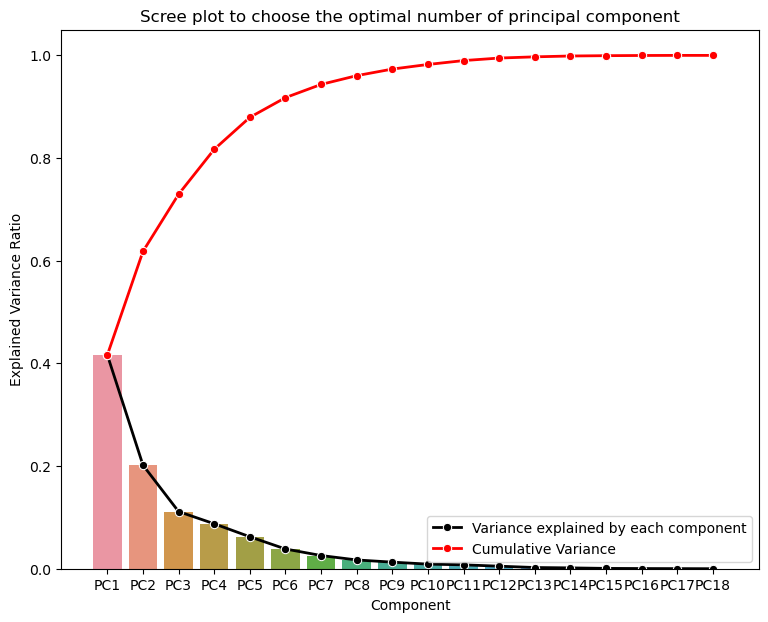

In [61]:
plt.figure(figsize=(9,7))
sns.barplot(
    data=temp,
    x='Component',
    y='Explained Variance Ratio'
)
sns.lineplot(
    data=temp,
    x='Component',
    y='Explained Variance Ratio',
    color='black',
    marker='o',
    linewidth=2,
    label='Variance explained by each component'
)
sns.lineplot(
    data=temp,
    x='Component',
    y='Cumulative Variance',
    color='red',
    marker='o',
    linewidth=2,
    label='Cumulative Variance'
)
plt.title("Scree plot to choose the optimal number of principal component")
plt.show()

Ideally we should choose the the number of components where we see a sharp change in exlained variance, here we will proceed with first five principal components

#### Choosing the optimal number of clusters using elbow plot

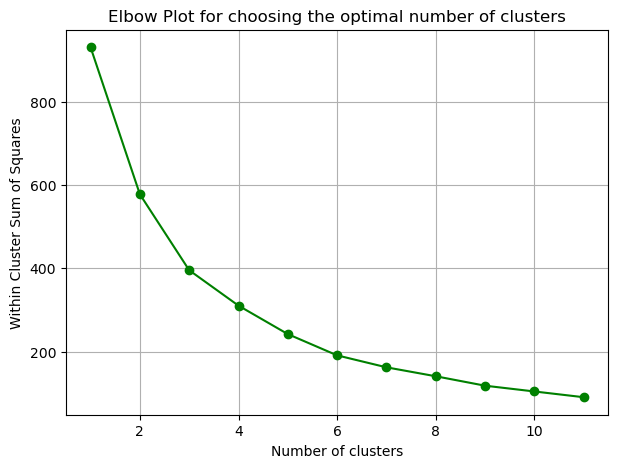

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    model = KMeans(
        n_clusters=i
    ).fit(pca_data.iloc[:,:5])
    wcss.append(model.inertia_)

plt.figure(figsize=(7,5))
plt.plot(
    [i for i in range(1,12)],
    wcss,
    marker='o',
    color='green'
)
plt.grid()
plt.title("Elbow Plot for choosing the optimal number of clusters")
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of clusters')
plt.show()

Using 4 as the optimal number of clusters

In [63]:
from sklearn.cluster import KMeans
model = KMeans(
        n_clusters=4
    ).fit(pca_data)
y_pred = model.predict(pca_data)
pca_data['Cluster'] = y_pred
pca_data['Cluster'].replace(
    {
        0:'Segment 1',
        1:'Segment 2',
        2:'Segment 3',
        3:'Segment 4'
    }, inplace=True
)

#### Biplot to visualize effect of each feature on each of the Principal Components

In [64]:
temp = pca.components_
temp = pd.DataFrame(
    temp,
    columns = new_col_names,
    index = pc_list
).T
temp.sample(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Wheelers type,0.475968,0.242061,0.000044,0.171432,-0.473831,-0.157661,0.072522,0.079208,-0.016387,-0.030352,0.010859,-0.174438,0.003936,0.309319,0.209708,0.434826,0.168436,-1.889822e-01
Fast Charging,-0.013580,0.025492,0.023744,-0.007630,-0.042735,-0.016726,-0.020195,0.017530,0.025142,0.018927,-0.997134,0.010635,-0.009481,-0.014437,-0.005223,-0.004208,-0.000676,1.541352e-17


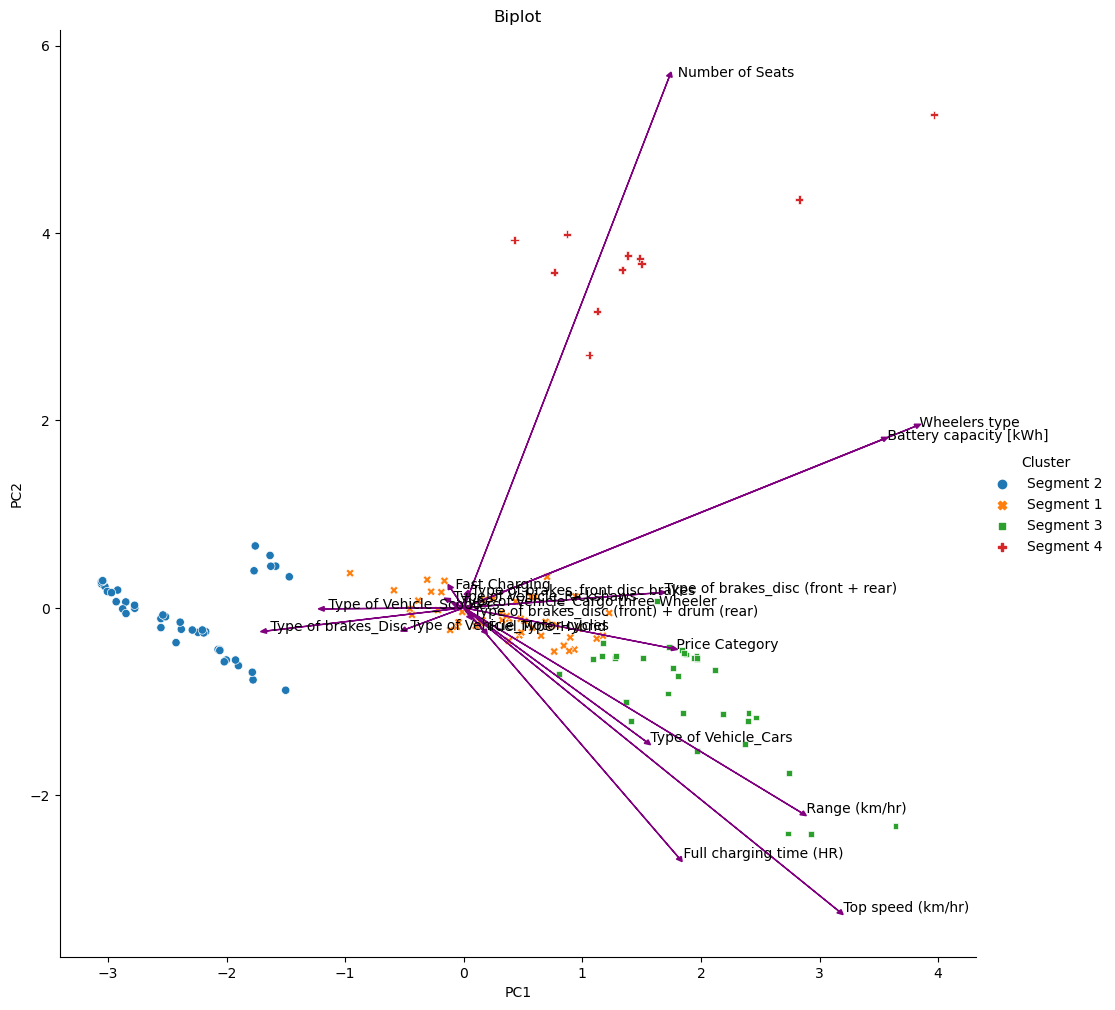

In [65]:
sns.relplot(
    kind='scatter',
    data=pca_data,
    x='PC1',
    y='PC2',
    hue='Cluster',
    style='Cluster',
    height=10,
    aspect=1
)
for i in range(data_transformed.shape[1]):
    plt.arrow(0,0,temp.iloc[i,0]*8, temp.iloc[i,1]*8, head_width=0.05, head_length=0.05, color='purple')
    plt.text(temp.iloc[i,0]*8, temp.iloc[i,1]*8,new_col_names[i])

plt.title('Biplot')
plt.show()

Segment 2 customers care most about the charging speed, top speed, range of the EV. They also prefer cars over motor cycles or other types of EV. They also care about the price of the EV.

On the other hand, segment 1 customers are most concerned about the the type of brake that they have and mostly they prefer disc brake and they also prefers motor cylces.

From the biplot above, it is clear that the segment 4 customers care most about the number of seats in EV and then battery capacity of the EV. This segment might correspond to electric bus or such EV owner.

The needs of segment 3 customers are very ambiguous, so its better to avoid that segment for an EV start-up.